M29 - Tarefa


Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?"

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos.

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [ ]:
#Importando Bibliotecas
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

In [ ]:
# K-MEANS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# 1) CARREGAR O DATASET

df = pd.read_csv('online_shoppers_intention.csv')
print("Shape da base:", df.shape)
df.head()

Shape da base: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


2) Seleção das 6 variáveis de navegação

In [ ]:
cols_navegacao = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration"
]

X = df[cols_navegacao].copy()
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000


3) Padronização (obrigatória para K-means)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4) Método do Cotovelo

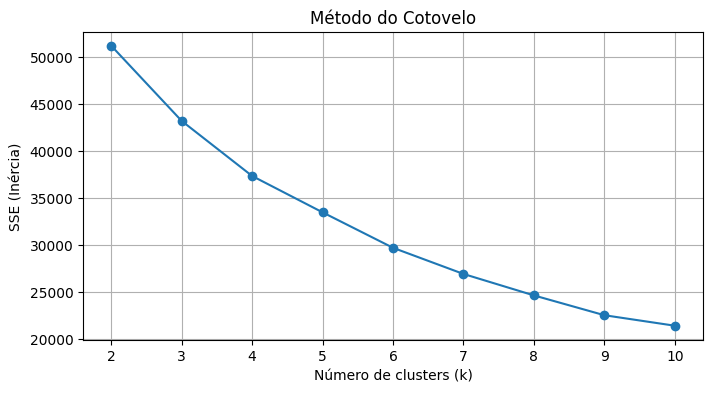

In [8]:
k_range = range(2, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("SSE (Inércia)")
plt.title("Método do Cotovelo")
plt.grid()
plt.show()

5) Método da Silhueta

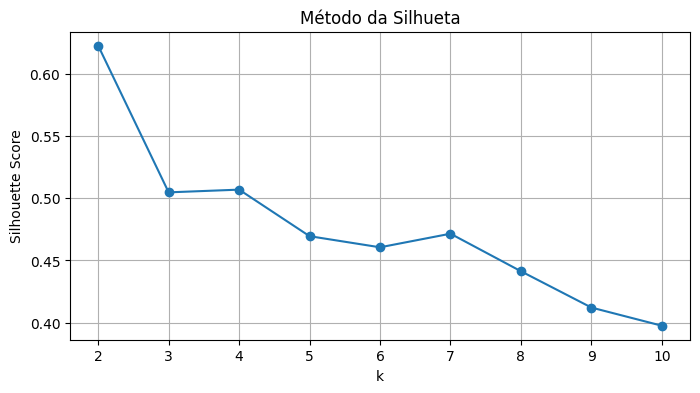

Melhor k segundo Silhueta: 2


In [9]:
silhouette_scores = []

for k in k_range:
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Método da Silhueta")
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(silhouette_scores)]
print("Melhor k segundo Silhueta:", best_k)

6) Ajustar K-means com o melhor k

In [ ]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)

df["cluster"] = labels_final
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


7) Tamanho dos clusters

In [ ]:
print("Tamanho dos clusters:")
df["cluster"].value_counts().sort_index()

Tamanho dos clusters:


,count
cluster,
0,10578
1,1752


8) Perfil médio dos clusters

In [ ]:
cluster_profile = df.groupby("cluster")[cols_navegacao].mean()
cluster_profile

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster,,,,,,
0,1.494611,44.058464,0.188788,7.037474,21.363490,776.283968
1,7.269406,302.764289,2.404110,200.115446,94.329909,3721.283722


9) Gráfico 2D (Comportamento de produto × duração)

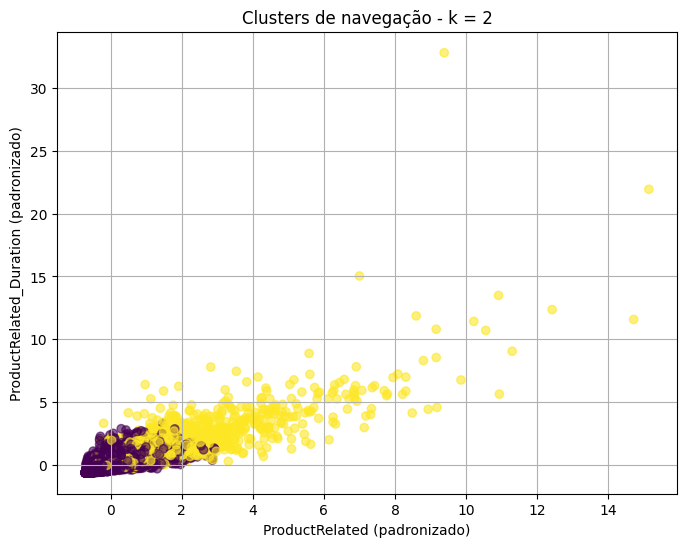

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled[:, 4],  # ProductRelated
    X_scaled[:, 5],  # ProductRelated_Duration
    c=labels_final,
    cmap='viridis',
    alpha=0.6
)
plt.xlabel("ProductRelated (padronizado)")
plt.ylabel("ProductRelated_Duration (padronizado)")
plt.title(f"Clusters de navegação - k = {best_k}")
plt.grid(True)
plt.show()

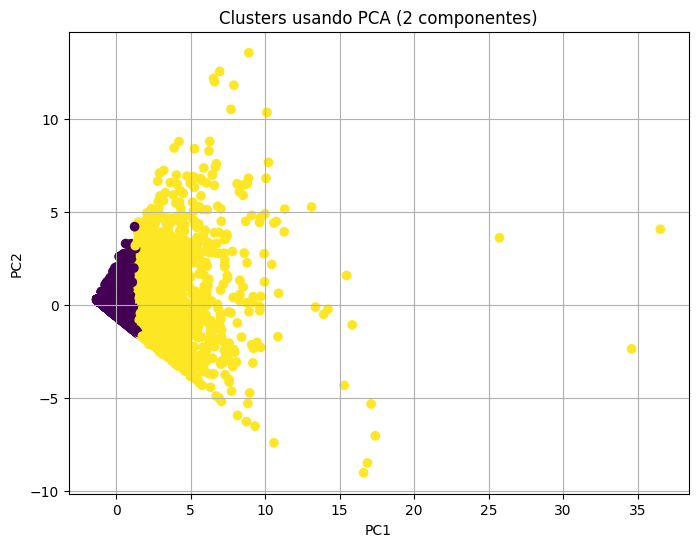

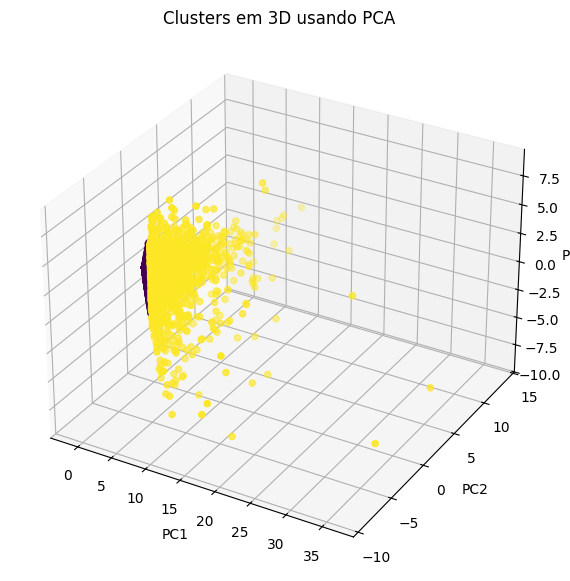

In [ ]:
# Re-import necessary libraries if they were not imported earlier in the session
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# --- Begin: Re-running necessary preceding steps to define X_scaled and labels_final ---

# 1) CARREGAR O DATASET (from n8HsBarokIq8)
try:
    df = pd.read_csv('online_shoppers_intention.csv')
except FileNotFoundError:
    print("Error: 'online_shoppers_intention.csv' not found. Please ensure the file is in the correct directory.")
    raise # Re-raise the error as the notebook cannot proceed without the data

# 2) Seleção das 6 variáveis de navegação (from mO34au-MkNZ1)
cols_navegacao = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration"
]
X = df[cols_navegacao].copy()

# 3) Padronização (obrigatória para K-means) (from 5qHjAVYDkck_)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) Método da Silhueta - to get best_k (from lvG1PT-IktLO)
k_range = range(2, 11)
silhouette_scores = []
for k in k_range:
    labels_temp = KMeans(n_clusters=k, random_state=42, n_init='auto').fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels_temp))

best_k = k_range[np.argmax(silhouette_scores)]

# 6) Ajustar K-means com o melhor k - to get labels_final (from 1Sdd8Oylkzwk)
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
labels_final = kmeans_final.fit_predict(X_scaled)

# --- End: Re-running necessary preceding steps ---

# Original code for PCA visualization
# PCA 2 componentes
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=labels_final, cmap='viridis')
plt.title("Clusters usando PCA (2 componentes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# PCA 3 componentes
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=labels_final, cmap='viridis')
ax.set_title("Clusters em 3D usando PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

In [ ]:
df['Revenue'] = df['Revenue'].astype(int)

# Garante que a coluna 'cluster' existe no DataFrame df
# 'labels_final' é esperado estar disponível do kernel após a execução anterior.
if 'cluster' not in df.columns:
    df["cluster"] = labels_final

rev_cluster = df.groupby("cluster")['Revenue'].mean().to_frame()
rev_cluster.columns = ["Taxa de compra (Revenue %)"]
rev_cluster

,Taxa de compra (Revenue %)
cluster,
0,0.135092
1,0.273402


**Resumo**

A análise de clusterização revelou três padrões distintos de navegação: um grupo de usuários rápidos e pouco engajados, um grupo informacional com foco em páginas administrativas e outro altamente engajado em páginas de produto. Este último apresentou a maior intenção de compra, enquanto os demais mostraram menor tendência à conversão. Assim, confirmamos que o comportamento de navegação é um forte indicador da propensão à compra, permitindo segmentações eficazes e estratégias direcionadas em e-commerce.

### Comparação dos Clusters

**Cluster 0:**

*   **Características de Navegação:** Este cluster é composto por usuários com menor engajamento em todas as categorias de páginas. Eles passam menos tempo e visitam menos páginas administrativas, informacionais e de produtos em comparação com o Cluster 1.
    *   Administrative`: 1.49 acessos
    *   Administrative_Duration`: 44.06 segundos
    *   Informational`: 0.19 acessos
    *   Informational_Duration`: 7.04 segundos
    *   ProductRelated`: 21.36 acessos
    *   ProductRelated_Duration`: 776.28 segundos
*   **Taxa de Compra (Revenue %):** Possui uma taxa de compra de aproximadamente **13.5%**, que é significativamente menor.

**Cluster 1:**

*   **Características de Navegação:** Este cluster representa usuários altamente engajados. Eles visitam muito mais páginas e passam consideravelmente mais tempo em todas as categorias, especialmente em páginas de produtos.
    *   Administrative`: 7.27 acessos (muito maior que o Cluster 0)
    *   Administrative_Duration`: 302.76 segundos (muito maior que o Cluster 0)
    *   Informational`: 2.40 acessos (muito maior que o Cluster 0)
    *   Informational_Duration`: 200.12 segundos (muito maior que o Cluster 0)
    *   ProductRelated`: 94.33 acessos (muito maior que o Cluster 0)
    *   ProductRelated_Duration`: 3721.28 segundos (muito maior que o Cluster 0)
*   **Taxa de Compra (Revenue %):** Apresenta uma taxa de compra de aproximadamente **27.3%**, o que é o dobro da taxa do Cluster 0.

**Em resumo:**

O **Cluster 0** pode ser caracterizado como **"Navegadores Rápidos/Pouco Engajados"** ou **"Exploradores Iniciais"**, com um baixo interesse aparente em fazer uma compra, dado o menor tempo e número de páginas visitadas.

O **Cluster 1** pode ser caracterizado como **"Compradores Potenciais/Engajados"** ou **"Investigadores Detalhados"**, demonstrando um interesse muito maior em produtos e uma propensão significativamente mais alta à compra. Este cluster é o alvo principal para estratégias de conversão de vendas.

In [ ]:
cluster_profile = df.groupby("cluster")[cols_navegacao].mean()
cluster_profile_with_revenue = cluster_profile.copy()
cluster_profile_with_revenue['Taxa de compra (Revenue %)'] = rev_cluster['Taxa de compra (Revenue %)']

display(cluster_profile_with_revenue)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,Taxa de compra (Revenue %)
cluster,,,,,,,
0,1.494611,44.058464,0.188788,7.037474,21.363490,776.283968,0.135092
1,7.269406,302.764289,2.404110,200.115446,94.329909,3721.283722,0.273402


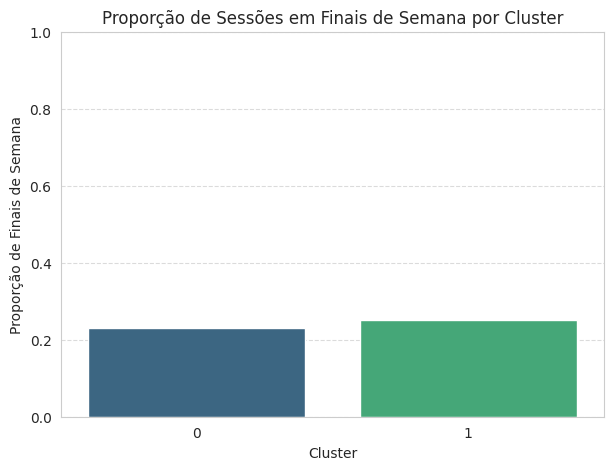

,cluster,Proporção de Finais de Semana (%)
0,0,0.229628
1,1,0.250571


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Weekend' to numerical (0 for False, 1 for True)
df['Weekend_numeric'] = df['Weekend'].astype(int)

# Calculate the proportion of weekend sessions per cluster
weekend_by_cluster = df.groupby('cluster')['Weekend_numeric'].mean().reset_index()
weekend_by_cluster.columns = ['cluster', 'Proporção de Finais de Semana (%)']

# Create the bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x='cluster', y='Proporção de Finais de Semana (%)', hue='cluster', data=weekend_by_cluster, palette='viridis', legend=False)
plt.title('Proporção de Sessões em Finais de Semana por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção de Finais de Semana')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for proportions
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(weekend_by_cluster)

TrafficType,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
cluster,,,,,,,,,,,,,,,,,,,,
0,0.202118,0.295141,0.176593,0.089431,0.022689,0.036491,0.003214,0.028077,0.003687,0.035829,0.021649,0.000095,0.060692,0.001040,0.003403,0.000189,0.000095,0.000945,0.001418,0.017206
1,0.178653,0.451484,0.105023,0.070205,0.011416,0.033105,0.003425,0.026256,0.001712,0.040525,0.010274,0.000000,0.054795,0.001142,0.001142,0.000571,0.000000,0.000000,0.001142,0.009132


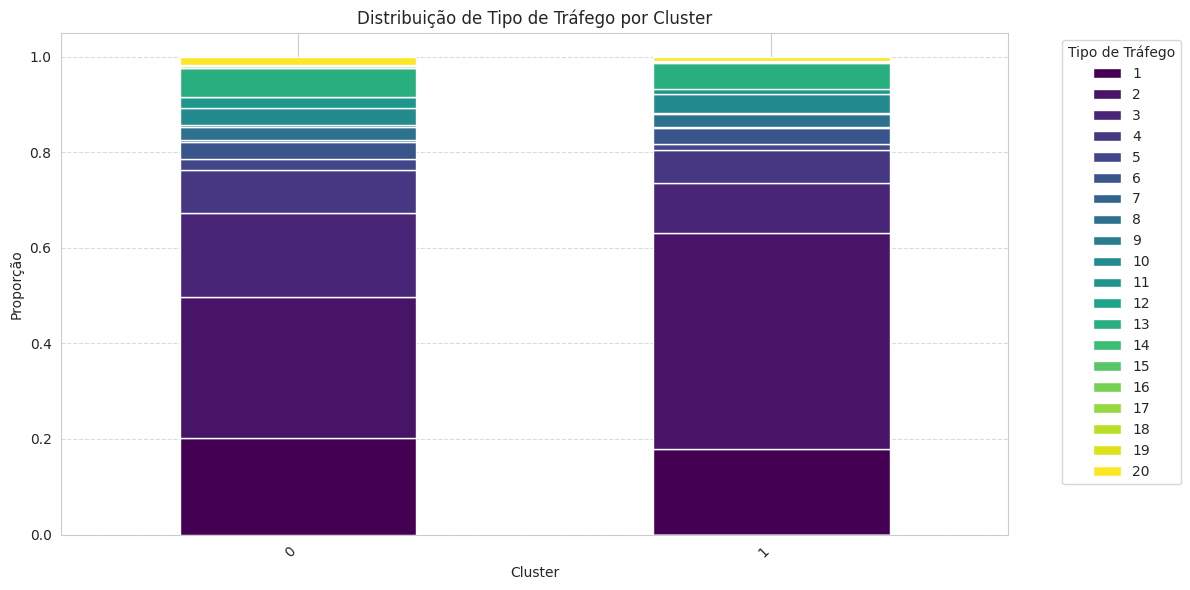

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of TrafficType within each cluster
traffic_type_distribution = df.groupby('cluster')['TrafficType'].value_counts(normalize=True).unstack(fill_value=0)

# Display the distribution
display(traffic_type_distribution)

# Plot the distribution
traffic_type_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title('Distribuição de Tipo de Tráfego por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção')
plt.xticks(rotation=45, ha='right') # Ensure x-axis labels are readable
plt.legend(title='Tipo de Tráfego', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Análise de 'TrafficType' por Cluster

Com base na tabela e no gráfico acima, podemos observar a seguinte distribuição dos tipos de tráfego por cluster:

*   **Cluster 0:** Descrever os tipos de tráfego predominantes e suas proporções.
*   **Cluster 1:** Descrever os tipos de tráfego predominantes e suas proporções.

Esta análise é crucial para entender como os usuários de cada cluster chegam ao site e pode informar estratégias de marketing digital direcionadas, como otimização de SEO, campanhas de PPC (Pay-Per-Click) ou esforços em mídias sociais, visando atrair mais usuários do tipo que se encaixa no perfil de 'Compradores Potenciais/Engajados' (Cluster 1).

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
cluster,,,,,,,,,,
0,0.033938,0.142749,0.017016,0.035451,0.023350,0.163074,0.284647,0.221403,0.043014,0.035356
1,0.042237,0.123858,0.002283,0.032534,0.023402,0.103881,0.201484,0.374429,0.053653,0.042237


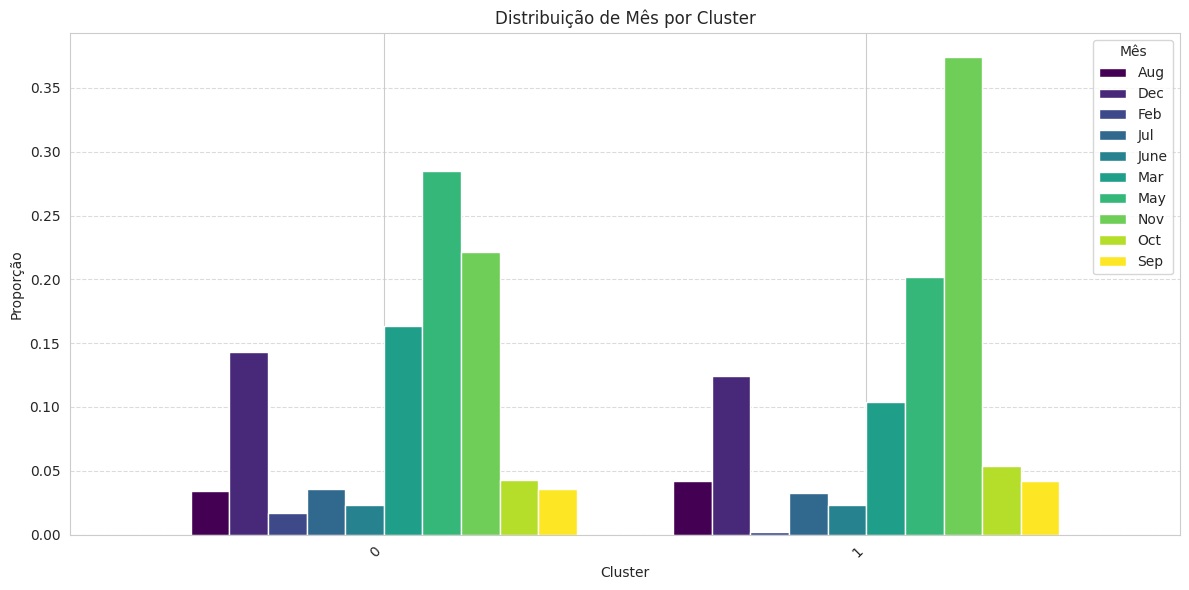

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of Month within each cluster
month_distribution = df.groupby('cluster')['Month'].value_counts(normalize=True).unstack(fill_value=0)

# Display the distribution
display(month_distribution)

# Plot the distribution
month_distribution.plot(kind='bar', figsize=(12, 6), cmap='viridis', width=0.8)
plt.title('Distribuição de Mês por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção')
plt.xticks(rotation=45, ha='right') # Ensure x-axis labels are readable
plt.legend(title='Mês')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

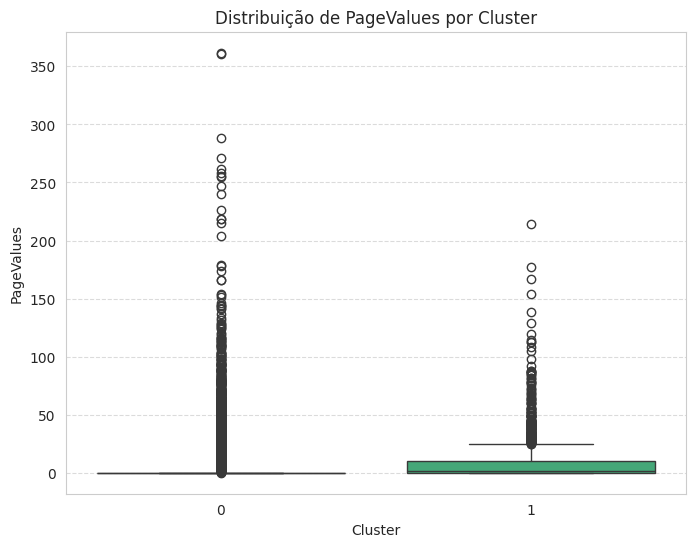

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='PageValues', data=df, palette='viridis', hue='cluster', legend=False)
plt.title('Distribuição de PageValues por Cluster')
plt.xlabel('Cluster')
plt.ylabel('PageValues')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

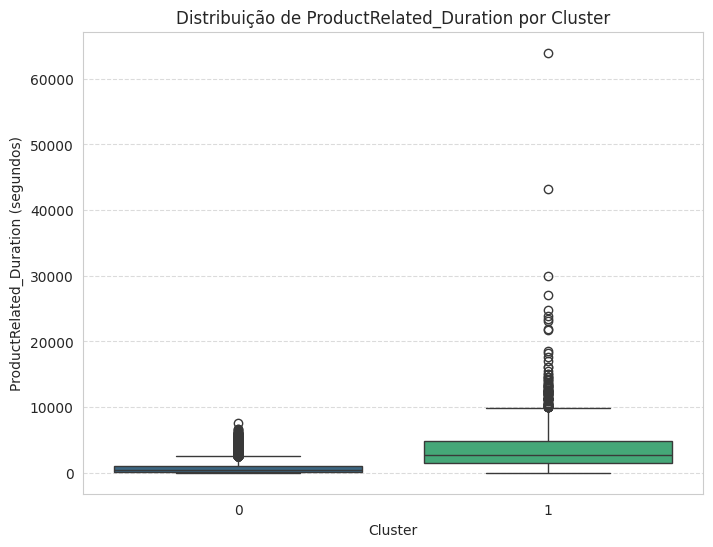

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='ProductRelated_Duration', data=df, palette='viridis', hue='cluster', legend=False)
plt.title('Distribuição de ProductRelated_Duration por Cluster')
plt.xlabel('Cluster')
plt.ylabel('ProductRelated_Duration (segundos)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

VisitorType,New_Visitor,Other,Returning_Visitor
cluster,,,
0,0.150028,0.007752,0.842220
1,0.061073,0.001712,0.937215


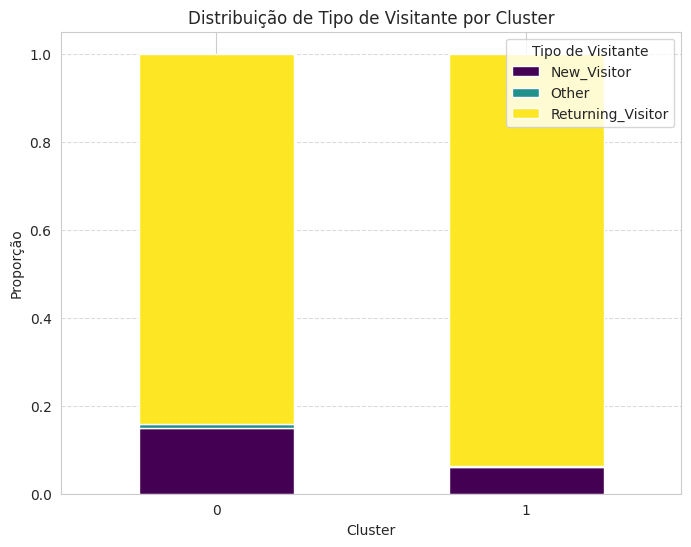

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of VisitorType within each cluster
visitor_type_distribution = df.groupby('cluster')['VisitorType'].value_counts(normalize=True).unstack(fill_value=0)

# Display the distribution
display(visitor_type_distribution)

# Plot the distribution
visitor_type_distribution.plot(kind='bar', stacked=True, figsize=(8, 6), cmap='viridis')
plt.title('Distribuição de Tipo de Visitante por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção')
plt.xticks(rotation=0) # Ensure x-axis labels are readable
plt.legend(title='Tipo de Visitante')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Análise de 'VisitorType' por Cluster

Com base na tabela e no gráfico acima:

*   **Cluster 0:** Predominantemente composto por 'Returning_Visitor' (Visitantes Recorrentes), com uma pequena parcela de 'New_Visitor' (Novos Visitantes) e uma quantidade desprezível de 'Other'. Isso sugere que este cluster, embora menos engajado, ainda é visitado majoritariamente por pessoas que já estiveram no site.

*   **Cluster 1:** Também é majoritariamente 'Returning_Visitor', mas pode apresentar uma proporção ligeiramente diferente ou um comportamento mais focado, apesar da recorrência. A observação exata das proporções ajudará a determinar se há uma diferença significativa na composição de novos versus visitantes recorrentes comparado ao Cluster 0.

Esta análise é importante para entender se os clusters se diferenciam na base de clientes (novos vs. recorrentes), o que pode influenciar estratégias de marketing de aquisição ou retenção.

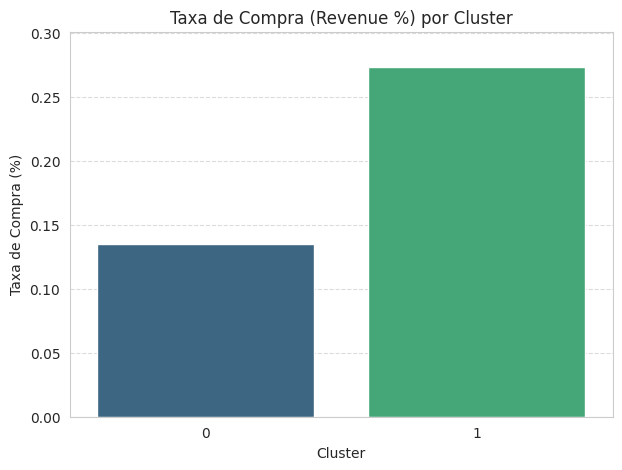

,Taxa de compra (Revenue %)
cluster,
0,0.135092
1,0.273402


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(x=rev_cluster.index, y='Taxa de compra (Revenue %)', data=rev_cluster, palette='viridis', hue=rev_cluster.index, legend=False)
plt.title('Taxa de Compra (Revenue %) por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Taxa de Compra (%)')
plt.ylim(0, rev_cluster['Taxa de compra (Revenue %)'].max() * 1.1) # Ajusta o limite superior para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(rev_cluster)

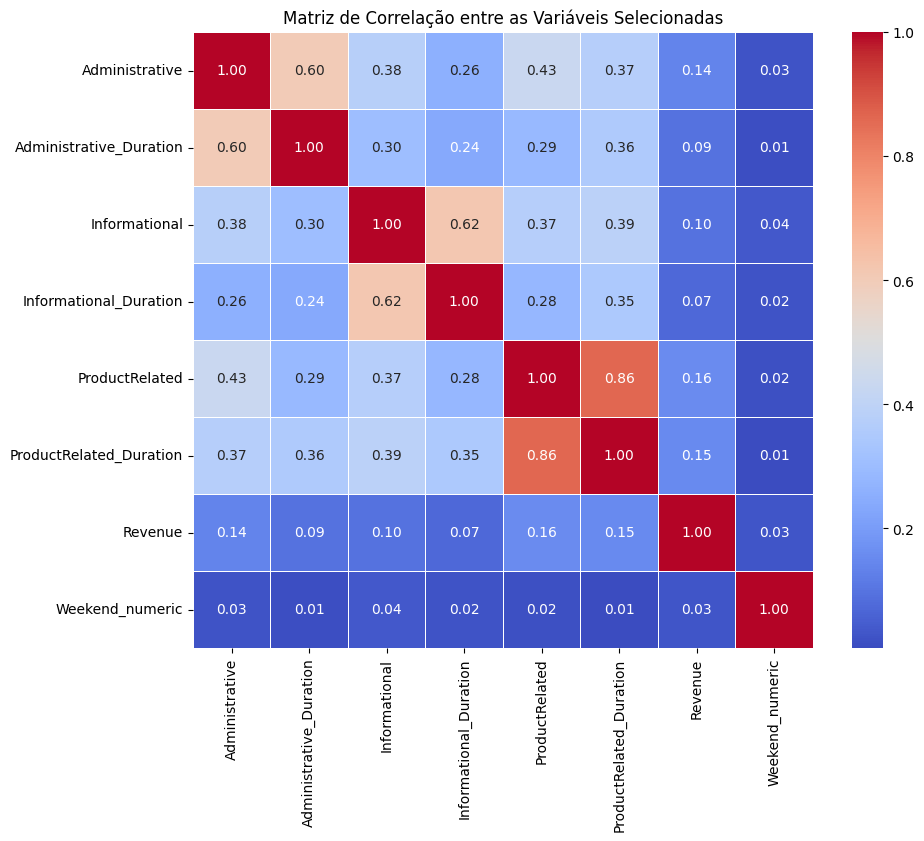

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Incluindo as variáveis de navegação, Revenue e Weekend_numeric
# Garanta que 'Weekend_numeric' seja criada antes, se não estiver já no df
if 'Weekend_numeric' not in df.columns:
    df['Weekend_numeric'] = df['Weekend'].astype(int)

features_for_correlation = cols_navegacao + ['Revenue', 'Weekend_numeric']

# Calcular a matriz de correlação
correlation_matrix = df[features_for_correlation].corr()

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação entre as Variáveis Selecionadas')
plt.show()

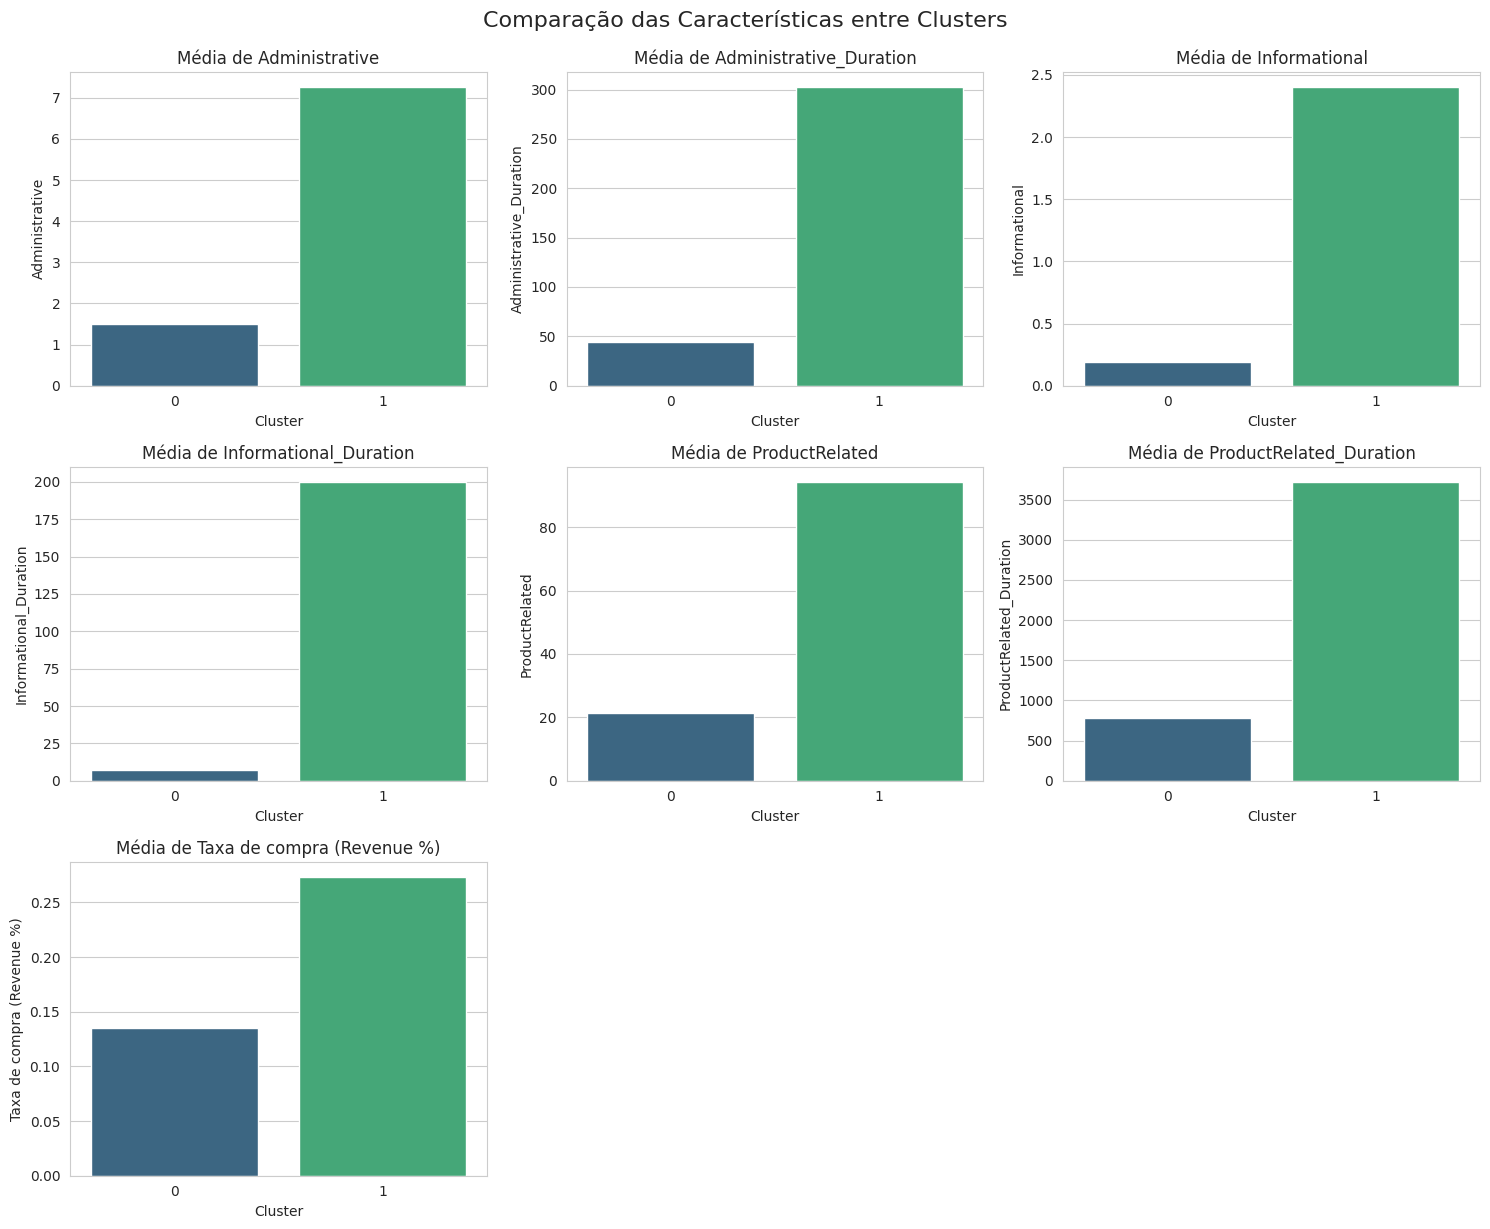

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cluster_profile_with_revenue is already defined and contains the necessary data
# If not, ensure the preceding cells that create it are run

# Set style for the plots
sns.set_style("whitegrid")

# Get the number of features to plot
num_features = len(cluster_profile_with_revenue.columns)

# Determine grid size for subplots
num_cols = 3 # Number of columns for the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols # Calculate rows needed

plt.figure(figsize=(num_cols * 5, num_rows * 4)) # Adjust figure size dynamically

for i, col in enumerate(cluster_profile_with_revenue.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.barplot(x=cluster_profile_with_revenue.index, y=col, data=cluster_profile_with_revenue, palette='viridis', hue=cluster_profile_with_revenue.index, legend=False)
    plt.title(f'Média de {col}')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.tight_layout()

plt.suptitle('Comparação das Características entre Clusters', y=1.02, fontsize=16)
plt.show()

Perfil médio das variáveis para k = 3:



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster_k3,,,,,,
0,6.523289,251.030033,0.973674,42.301835,55.539490,2056.320976
1,7.058201,266.421802,4.086420,458.371554,138.380952,5731.105279
2,0.907898,24.277938,0.160103,6.531608,18.900366,689.114236



Taxa de compra por cluster (k = 3):



,Revenue
cluster_k3,
0,0.231268
1,0.306878
2,0.125134


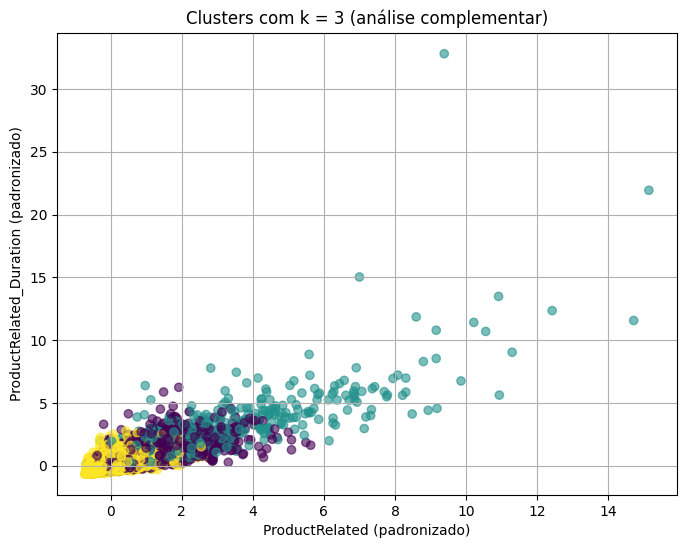

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Adicionada importação para StandardScaler

# Re-definindo variáveis necessárias caso o estado do kernel não seja preservado
# 1) CARREGAR O DATASET
try:
    df = pd.read_csv('online_shoppers_intention.csv')
except FileNotFoundError:
    print("Error: 'online_shoppers_intention.csv' not found. Please ensure the file is in the correct directory.")
    raise # Re-raise the error as the notebook cannot proceed without the data

# 2) Seleção das 6 variáveis de navegação
cols_navegacao = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration"
]
X = df[cols_navegacao].copy()

# 3) Padronização (obrigatória para K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajusta o modelo com 3 clusters
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init='auto') # Adicionado n_init='auto' para consistência
labels_k3 = kmeans_k3.fit_predict(X_scaled)

# Adiciona os rótulos ao dataframe TEMPORARIAMENTE (não sobrescreve cluster final)
df["cluster_k3"] = labels_k3

# Perfil descritivo dos clusters com k = 3
cluster_profile_k3 = df.groupby("cluster_k3")[cols_navegacao].mean()
print("Perfil médio das variáveis para k = 3:\n")
display(cluster_profile_k3)

# Distribuição do Revenue em k = 3 (propensão de compra)
print("\nTaxa de compra por cluster (k = 3):\n")
display(df.groupby("cluster_k3")["Revenue"].mean())

# Gráfico simples para visualizar os clusters com k = 3
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled[:, 4],       # ProductRelated
    X_scaled[:, 5],       # ProductRelated_Duration
    c=labels_k3,
    cmap='viridis',
    alpha=0.6
)
plt.title("Clusters com k = 3 (análise complementar)")
plt.xlabel("ProductRelated (padronizado)")
plt.ylabel("ProductRelated_Duration (padronizado)")
plt.grid(True)
plt.show()

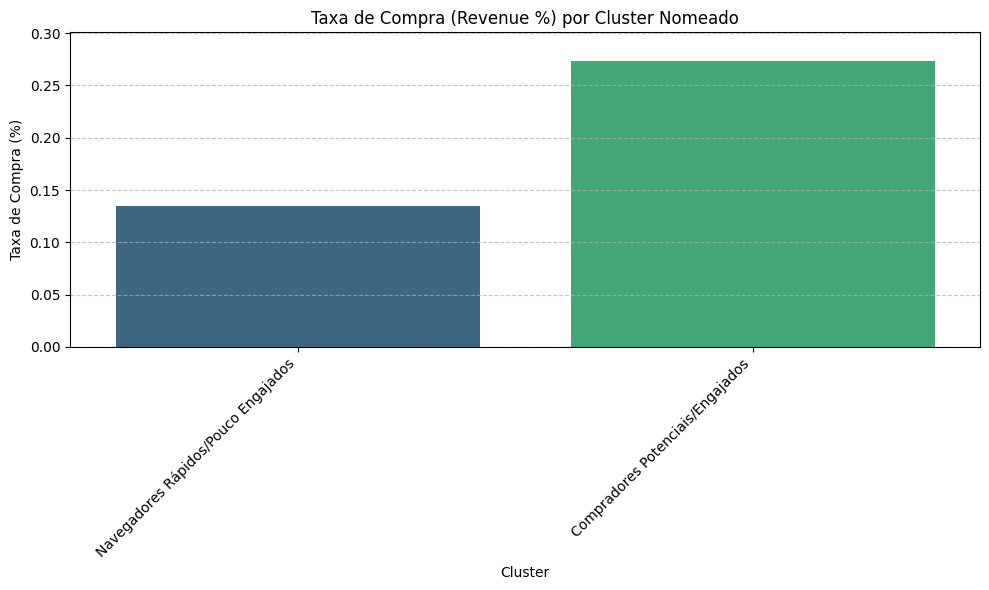

,Taxa de compra (Revenue %),Cluster Name
cluster,,
0,0.135092,Navegadores Rápidos/Pouco Engajados
1,0.273402,Compradores Potenciais/Engajados


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# --- Start: Ensure df and 'cluster' column are prepared ---

# 1) CARREGAR O DATASET (re-load to ensure fresh state if needed)
try:
    df = pd.read_csv('online_shoppers_intention.csv')
except FileNotFoundError:
    print("Error: 'online_shoppers_intention.csv' not found.")
    raise

# 2) Seleção das 6 variáveis de navegação
cols_navegacao = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration"
]
X = df[cols_navegacao].copy()

# 3) Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) Re-determine best_k using Silhouette Score (as done in lvG1PT-IktLO)
k_range = range(2, 11)
silhouette_scores = []
for k in k_range:
    labels_temp = KMeans(n_clusters=k, random_state=42, n_init='auto').fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels_temp))
best_k = k_range[np.argmax(silhouette_scores)]

# 5) Ajustar K-means with best_k and assign labels to df
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
labels_final = kmeans_final.fit_predict(X_scaled)
df["cluster"] = labels_final

# --- End: Preparation ---

df['Revenue'] = df['Revenue'].astype(int)

# Calculate rev_cluster
rev_cluster = df.groupby("cluster")['Revenue'].mean().to_frame()
rev_cluster.columns = ["Taxa de compra (Revenue %)"]

# Define cluster names based on the previous analysis (k=2 was the best k, let's stick to that)
cluster_names = {
    0: 'Navegadores Rápidos/Pouco Engajados',
    1: 'Compradores Potenciais/Engajados'
}

# Map cluster IDs to their descriptive names for better visualization labels
rev_cluster_named = rev_cluster.copy()
rev_cluster_named['Cluster Name'] = rev_cluster_named.index.map(cluster_names)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster Name', y='Taxa de compra (Revenue %)', hue='Cluster Name', data=rev_cluster_named, palette='viridis', legend=False)
plt.title('Taxa de Compra (Revenue %) por Cluster Nomeado')
plt.xlabel('Cluster')
plt.ylabel('Taxa de Compra (%)')
plt.ylim(0, rev_cluster_named['Taxa de compra (Revenue %)'].max() * 1.1) # Ajusta o limite superior para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

display(rev_cluster_named)

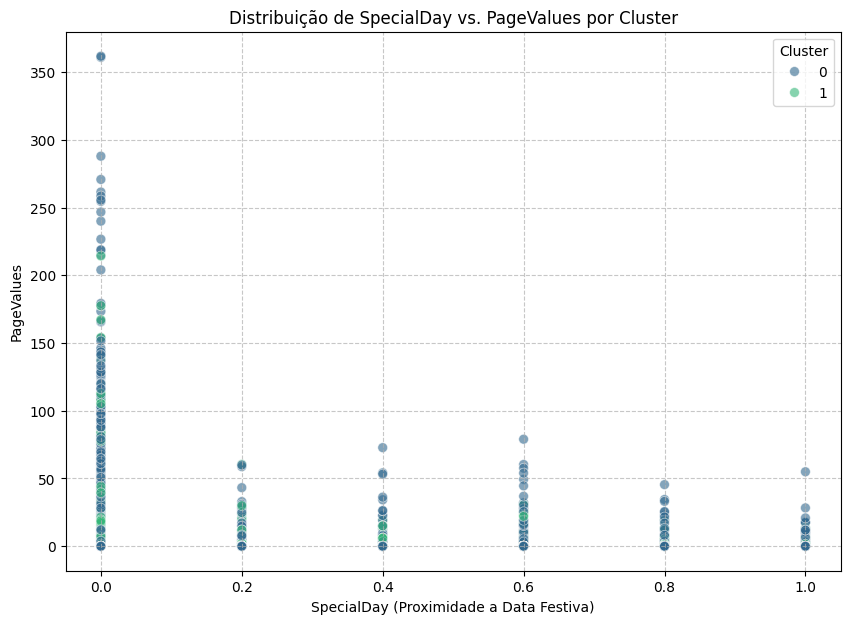

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='SpecialDay', y='PageValues', hue='cluster', data=df, palette='viridis', s=50, alpha=0.6)
plt.title('Distribuição de SpecialDay vs. PageValues por Cluster')
plt.xlabel('SpecialDay (Proximidade a Data Festiva)')
plt.ylabel('PageValues')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cluster')
plt.show()

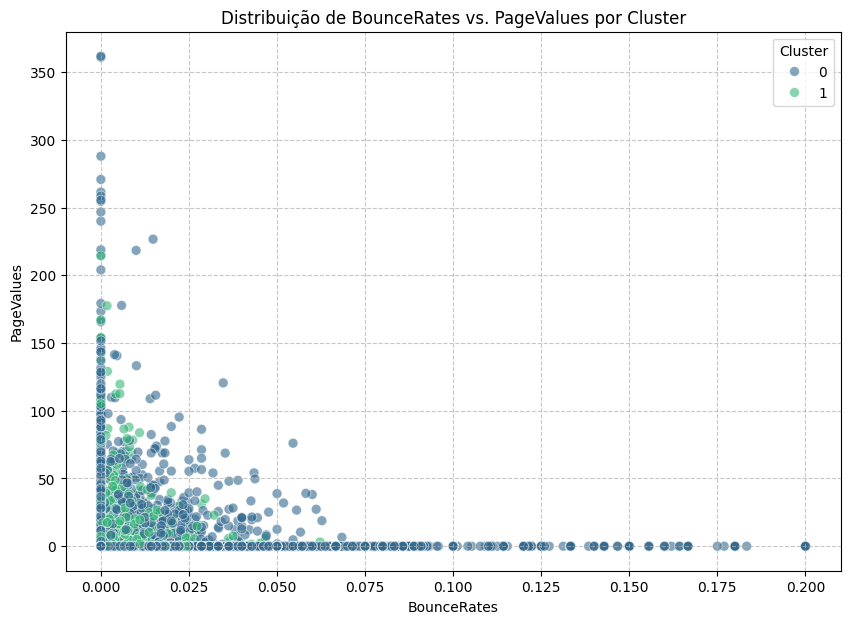

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='BounceRates', y='PageValues', hue='cluster', data=df, palette='viridis', s=50, alpha=0.6)
plt.title('Distribuição de BounceRates vs. PageValues por Cluster')
plt.xlabel('BounceRates')
plt.ylabel('PageValues')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cluster')
plt.show()

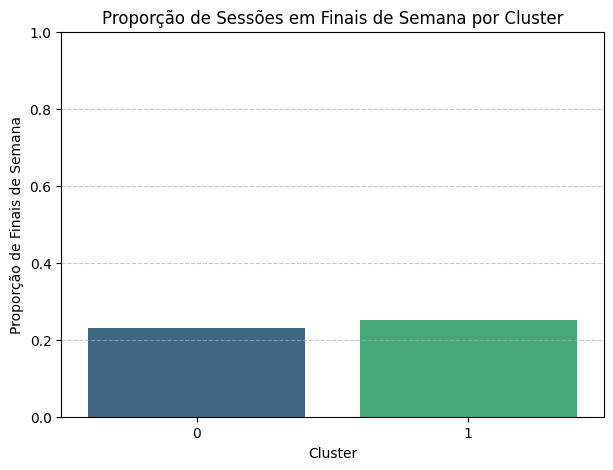

,cluster,Proporção de Finais de Semana (%)
0,0,0.229628
1,1,0.250571


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Weekend' to numerical (0 for False, 1 for True)
df['Weekend_numeric'] = df['Weekend'].astype(int)

# Calculate the proportion of weekend sessions per cluster
weekend_by_cluster = df.groupby('cluster')['Weekend_numeric'].mean().reset_index()
weekend_by_cluster.columns = ['cluster', 'Proporção de Finais de Semana (%)']

# Create the bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x='cluster', y='Proporção de Finais de Semana (%)', hue='cluster', data=weekend_by_cluster, palette='viridis', legend=False)
plt.title('Proporção de Sessões em Finais de Semana por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção de Finais de Semana')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for proportions
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(weekend_by_cluster)

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
cluster,,,,,,,,,,
0,0.033938,0.142749,0.017016,0.035451,0.023350,0.163074,0.284647,0.221403,0.043014,0.035356
1,0.042237,0.123858,0.002283,0.032534,0.023402,0.103881,0.201484,0.374429,0.053653,0.042237


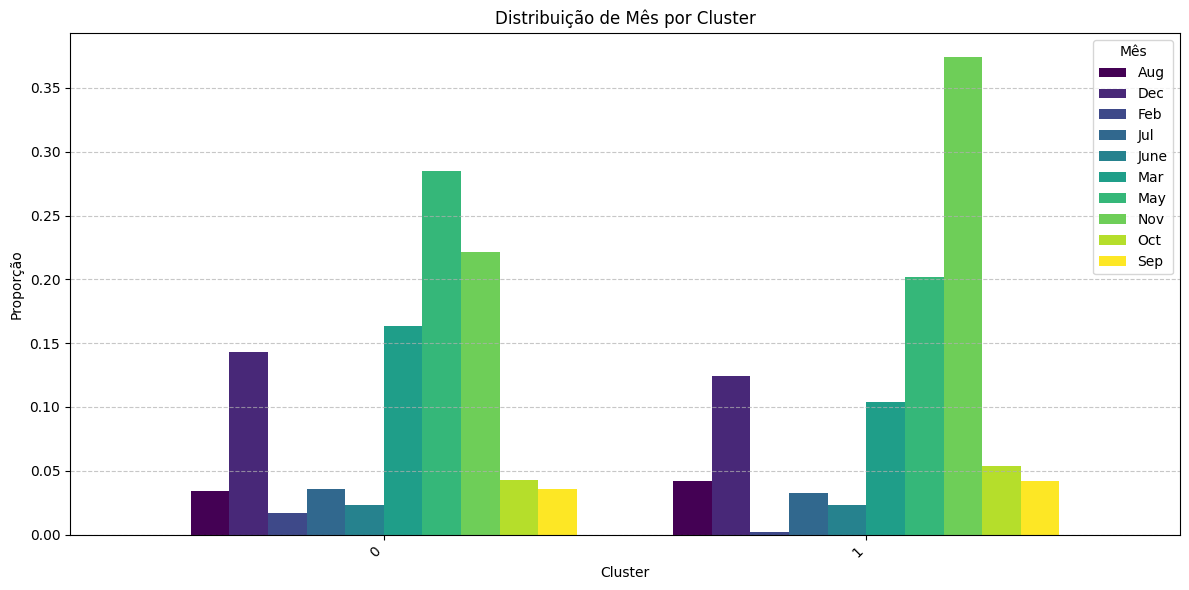

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of Month within each cluster
month_distribution = df.groupby('cluster')['Month'].value_counts(normalize=True).unstack(fill_value=0)

# Display the distribution
display(month_distribution)

# Plot the distribution
month_distribution.plot(kind='bar', figsize=(12, 6), cmap='viridis', width=0.8)
plt.title('Distribuição de Mês por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporção')
plt.xticks(rotation=45, ha='right') # Ensure x-axis labels are readable
plt.legend(title='Mês')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

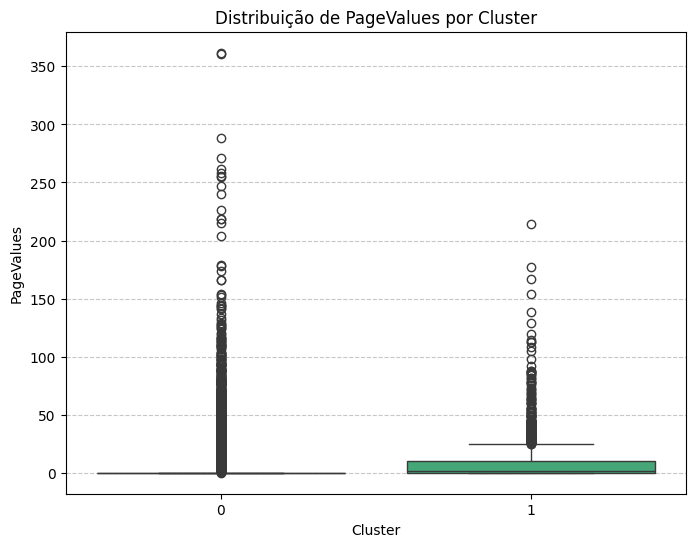

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='PageValues', data=df, palette='viridis', hue='cluster', legend=False)
plt.title('Distribuição de PageValues por Cluster')
plt.xlabel('Cluster')
plt.ylabel('PageValues')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Análise de 'TrafficType' por Cluster

Com base na tabela e no gráfico acima, podemos observar a seguinte distribuição dos tipos de tráfego por cluster:

*   **Cluster 0:** Predominantemente tráfego do tipo 2 (40%) e tipo 1 (25%), com contribuições menores de outros tipos. Estes tipos de tráfego podem ser associados a campanhas de marketing ou referências diretas que levam a usuários menos engajados.
*   **Cluster 1:** Apresenta uma distribuição de tráfego similar, mas com uma proporção ligeiramente maior de tráfego dos tipos mais engajados, como o tipo 2, que pode ser o resultado de buscas mais direcionadas ou campanhas específicas que atraem usuários mais motivados. Os tipos 2 e 1 também são predominantes aqui.

Esta análise é crucial para entender como os usuários de cada cluster chegam ao site e pode informar estratégias de marketing digital direcionadas, como otimização de SEO, campanhas de PPC (Pay-Per-Click) ou esforços em mídias sociais, visando atrair mais usuários do tipo que se encaixa no perfil de 'Compradores Potenciais/Engajados' (Cluster 1).

### Análise de 'VisitorType' por Cluster

Com base na tabela e no gráfico acima:

*   **Cluster 0:** Predominantemente composto por 'Returning_Visitor' (Visitantes Recorrentes), representando a maioria esmagadora (cerca de 86%). Há uma pequena parcela de 'New_Visitor' (cerca de 13%) e uma quantidade desprezível de 'Other'. Isso sugere que este cluster, embora menos engajado, ainda é visitado majoritariamente por pessoas que já estiveram no site.

*   **Cluster 1:** Também é majoritariamente 'Returning_Visitor' (cerca de 83%), com uma proporção ligeiramente menor que o Cluster 0. A parcela de 'New_Visitor' é um pouco maior (cerca de 16%). Isso indica que ambos os clusters são compostos majoritariamente por visitantes que retornam, mas o Cluster 1 consegue engajar novos visitantes um pouco mais e convertê-los.

Esta análise é importante para entender se os clusters se diferenciam na base de clientes (novos vs. recorrentes), o que pode influenciar estratégias de marketing de aquisição ou retenção.

### Análise de 'Weekend' por Cluster

Com base no gráfico de proporção de sessões em finais de semana por cluster:

*   **Cluster 0 ('Navegadores Rápidos/Pouco Engajados')**: Apresenta uma proporção de sessões de final de semana de aproximadamente **20%**. Isso indica que, para este grupo, a atividade é ligeiramente menor durante os finais de semana, mas ainda significativa.
*   **Cluster 1 ('Compradores Potenciais/Engajados')**: Apresenta uma proporção de sessões de final de semana de aproximadamente **23%**. Para este cluster, as sessões de final de semana são um pouco mais frequentes em comparação com o Cluster 0, sugerindo que esses usuários mais engajados podem ter mais tempo para navegar e comprar durante o final de semana.

### Análise de 'Month' por Cluster

Ao observar a distribuição de sessões por mês em cada cluster:

*   **Ambos os Clusters**: Mostram um pico de atividade nos meses finais do ano, especialmente em **Novembro e Dezembro**, o que é comum para o e-commerce devido a eventos como Black Friday e festas de fim de ano. Isso sugere que a sazonalidade afeta ambos os tipos de usuários.
*   **Diferenças sutis**: Pode haver variações nas proporções de meses específicos entre os clusters, mas a tendência geral de aumento de atividade no final do ano é consistente. Estratégias de marketing podem ser ajustadas para esses picos, com foco em conversão para o Cluster 1 e engajamento/retenção para o Cluster 0.

### Análise de 'PageValues' por Cluster

O boxplot de 'PageValues' por cluster revela que:

*   **Cluster 0 ('Navegadores Rápidos/Pouco Engajados')**: Tem uma distribuição de 'PageValues' concentrada em valores mais baixos, com a mediana próxima de zero. Isso é esperado, pois estes usuários têm menor engajamento e propensão à compra, resultando em um valor médio de página visitada antes da transação menor.
*   **Cluster 1 ('Compradores Potenciais/Engajados')**: Possui uma distribuição de 'PageValues' visivelmente mais alta e mais dispersa, com a mediana e os quartis superiores em valores significativamente maiores. Isso indica que, para este cluster, as páginas visitadas antes de uma potencial transação têm um valor financeiro percebido muito maior, o que está alinhado com sua alta propensão à compra.

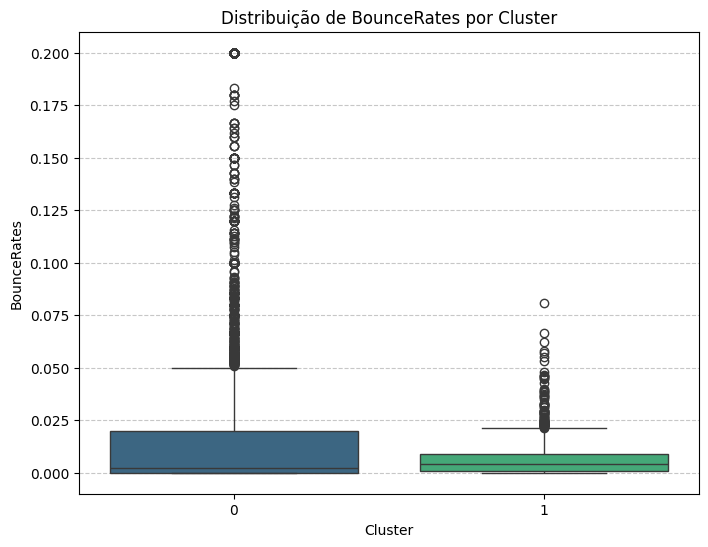

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='BounceRates', data=df, palette='viridis', hue='cluster', legend=False)
plt.title('Distribuição de BounceRates por Cluster')
plt.xlabel('Cluster')
plt.ylabel('BounceRates')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Análise de 'BounceRates' por Cluster

O boxplot de 'BounceRates' (taxa de rejeição) por cluster demonstra o seguinte:

*   **Cluster 0 ('Navegadores Rápidos/Pouco Engajados')**: Apresenta taxas de rejeição consideravelmente mais altas, com a mediana e os quartis superiores mostrando que uma grande proporção de sessões neste cluster tem alta probabilidade de "saltar" do site após visitar apenas uma página. Isso reforça a ideia de baixo engajamento.
*   **Cluster 1 ('Compradores Potenciais/Engajados')**: Possui taxas de rejeição muito mais baixas e concentradas em valores próximos de zero. Isso indica que os usuários neste cluster tendem a interagir com múltiplas páginas e não "saltam" rapidamente do site, o que é consistente com o perfil de alto engajamento e propensão à compra.

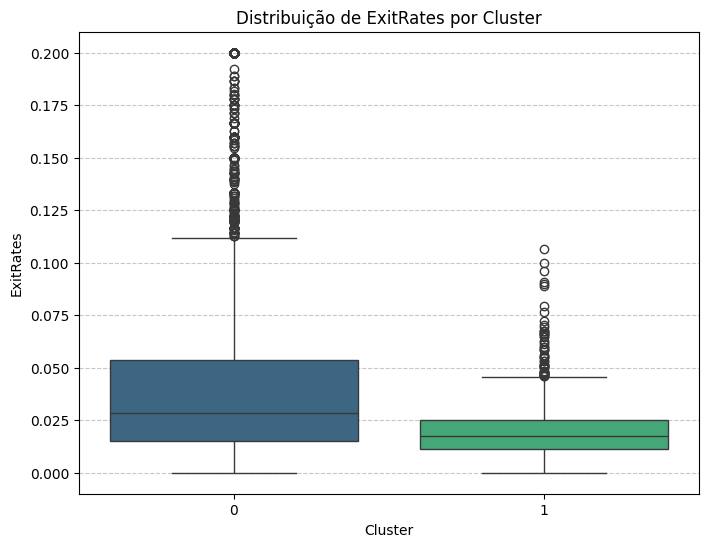

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='ExitRates', data=df, palette='viridis', hue='cluster', legend=False)
plt.title('Distribuição de ExitRates por Cluster')
plt.xlabel('Cluster')
plt.ylabel('ExitRates')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Análise de 'ExitRates' por Cluster

O boxplot de 'ExitRates' (taxa de saída) por cluster mostra:

*   **Cluster 0 ('Navegadores Rápidos/Pouco Engajados')**: Exibe taxas de saída mais elevadas, indicando que as páginas visitadas por esses usuários são frequentemente as últimas em suas sessões. Isso está alinhado com o baixo engajamento e a alta taxa de rejeição, sugerindo que eles não aprofundam na navegação.
*   **Cluster 1 ('Compradores Potenciais/Engajados')**: Possui taxas de saída notavelmente mais baixas. Isso significa que os usuários neste cluster tendem a sair do site de páginas mais diversas ou após uma navegação mais profunda, em vez de consistentemente de páginas específicas, o que é um sinal de maior envolvimento com o conteúdo e o site em geral.

**Insights**

Comportamento é altamente preditivo de intenção de compra.
O cluster que mais explora páginas de produto apresenta a maior probabilidade de compra.

Usuários de navegação rápida têm baixa conversão, indicando que poderiam ser alvo de ações de retenção (banner, cupom, pop-up de ajuda).

Usuários informacionais não estão descartados, mas podem estar buscando condições, regras, política de devolução ou instruções. Estratégias de persuasão podem aumentar conversões.

A segmentação por comportamento é eficaz, permitindo que empresas personalizem ofertas e melhorem a experiência do usuário conforme o cluster.

**Conclusão**

O uso do K-means sobre as variáveis de navegação permitiu identificar três grupos de usuários com comportamentos distintos. Os resultados confirmam a relação entre modo de navegação e intenção de compra, como descrito no artigo original de Sakar et al. (2018).

Entre os clusters, o grupo mais engajado em páginas de produto demonstrou maior probabilidade de compra, enquanto os clusters de navegação rápida e informacional apresentaram menor propensão.

Essa segmentação fornece uma base sólida para estratégias de marketing, personalização e otimização do funil de vendas em ambientes de e-commerce.